We finally have the first hst observations!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
import astropy.constants as const
import astropy.units as u
import importlib
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
path = '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/'
sx1s = glob.glob('{}*sx1.fits'.format(path))
cspecs = glob.glob('{}hasp/*cspec.fits'.format(path))
print(sx1s)
print(cspecs)

['/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02010_sx1.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02020_sx1.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02030_sx1.fits']
['/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb-g430l_ofem02_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb-g430l_ofem_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb_ofem02_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb_ofem_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g430l_ofem02_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g430l_ofem_cspec.fits']


/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02010_sx1.fits
G230LB
/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02020_sx1.fits
G230LB
/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02030_sx1.fits
G430L


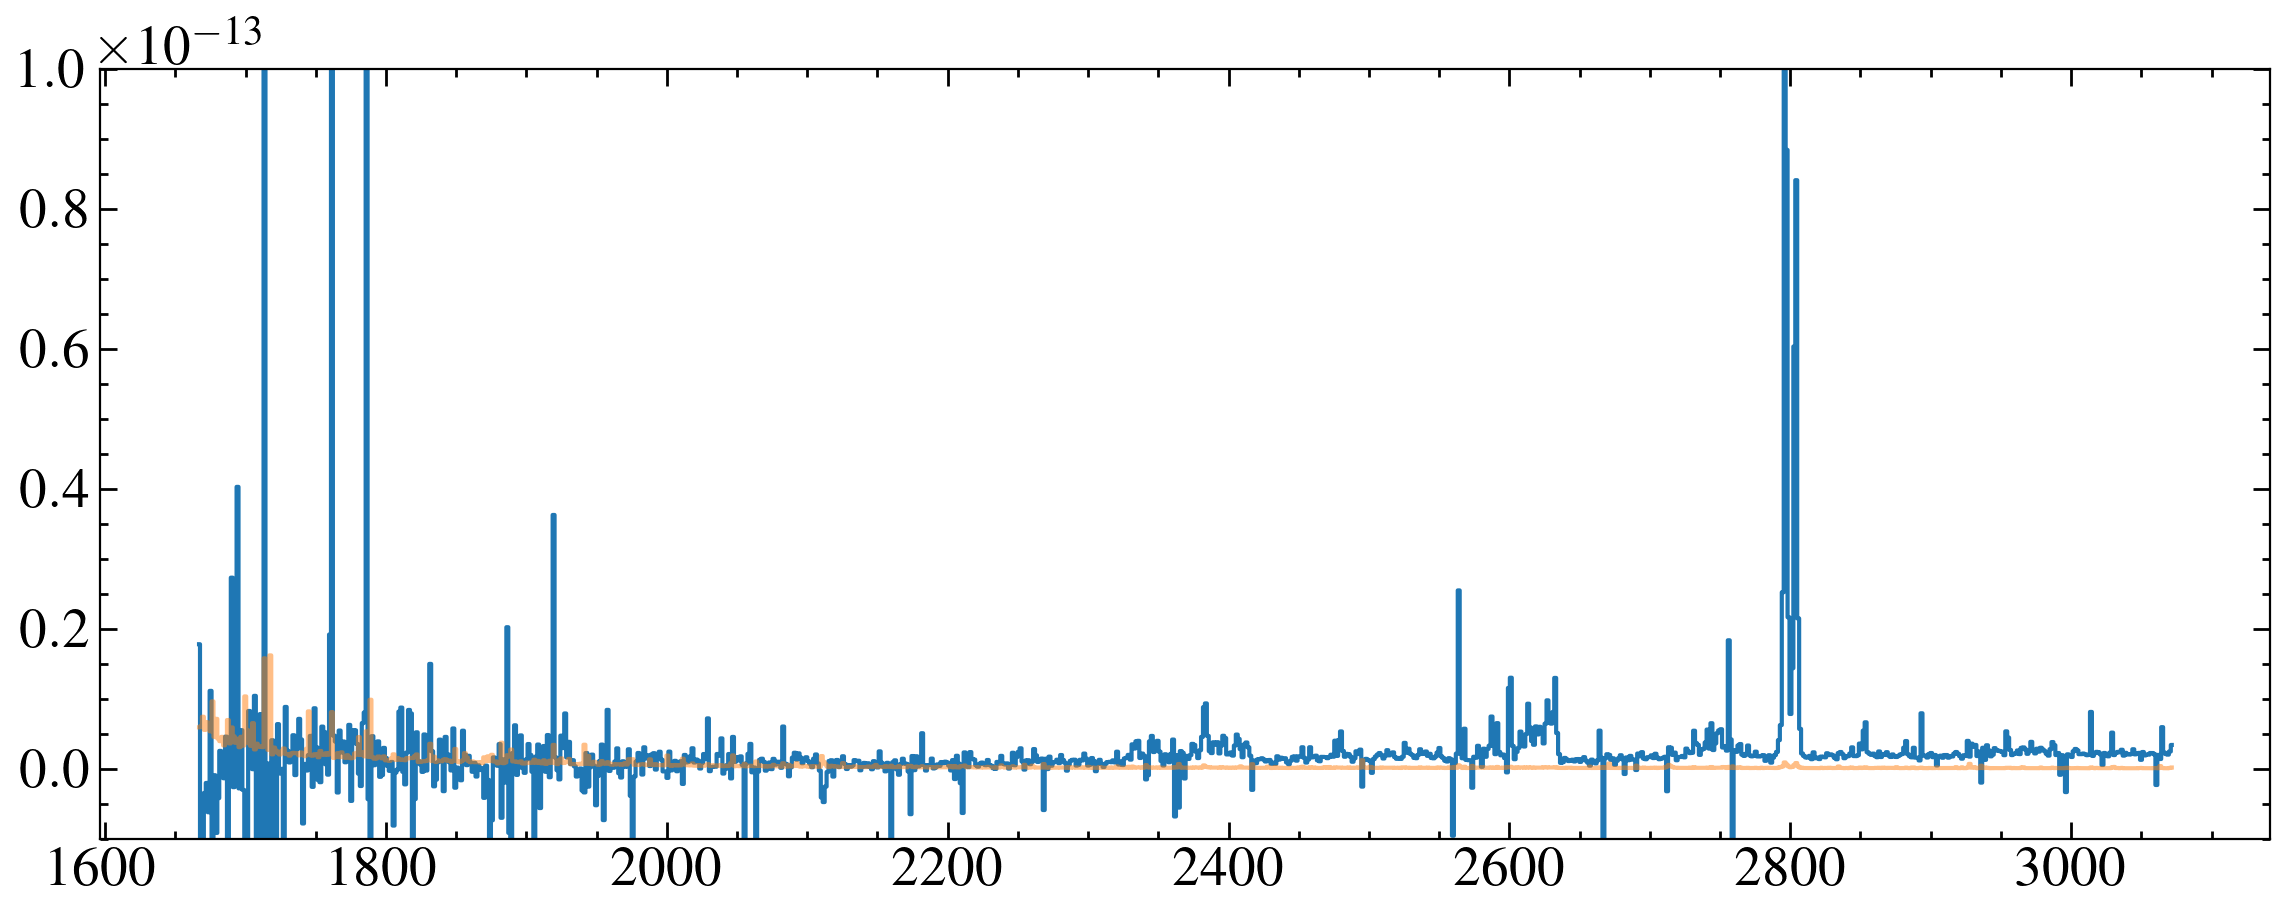

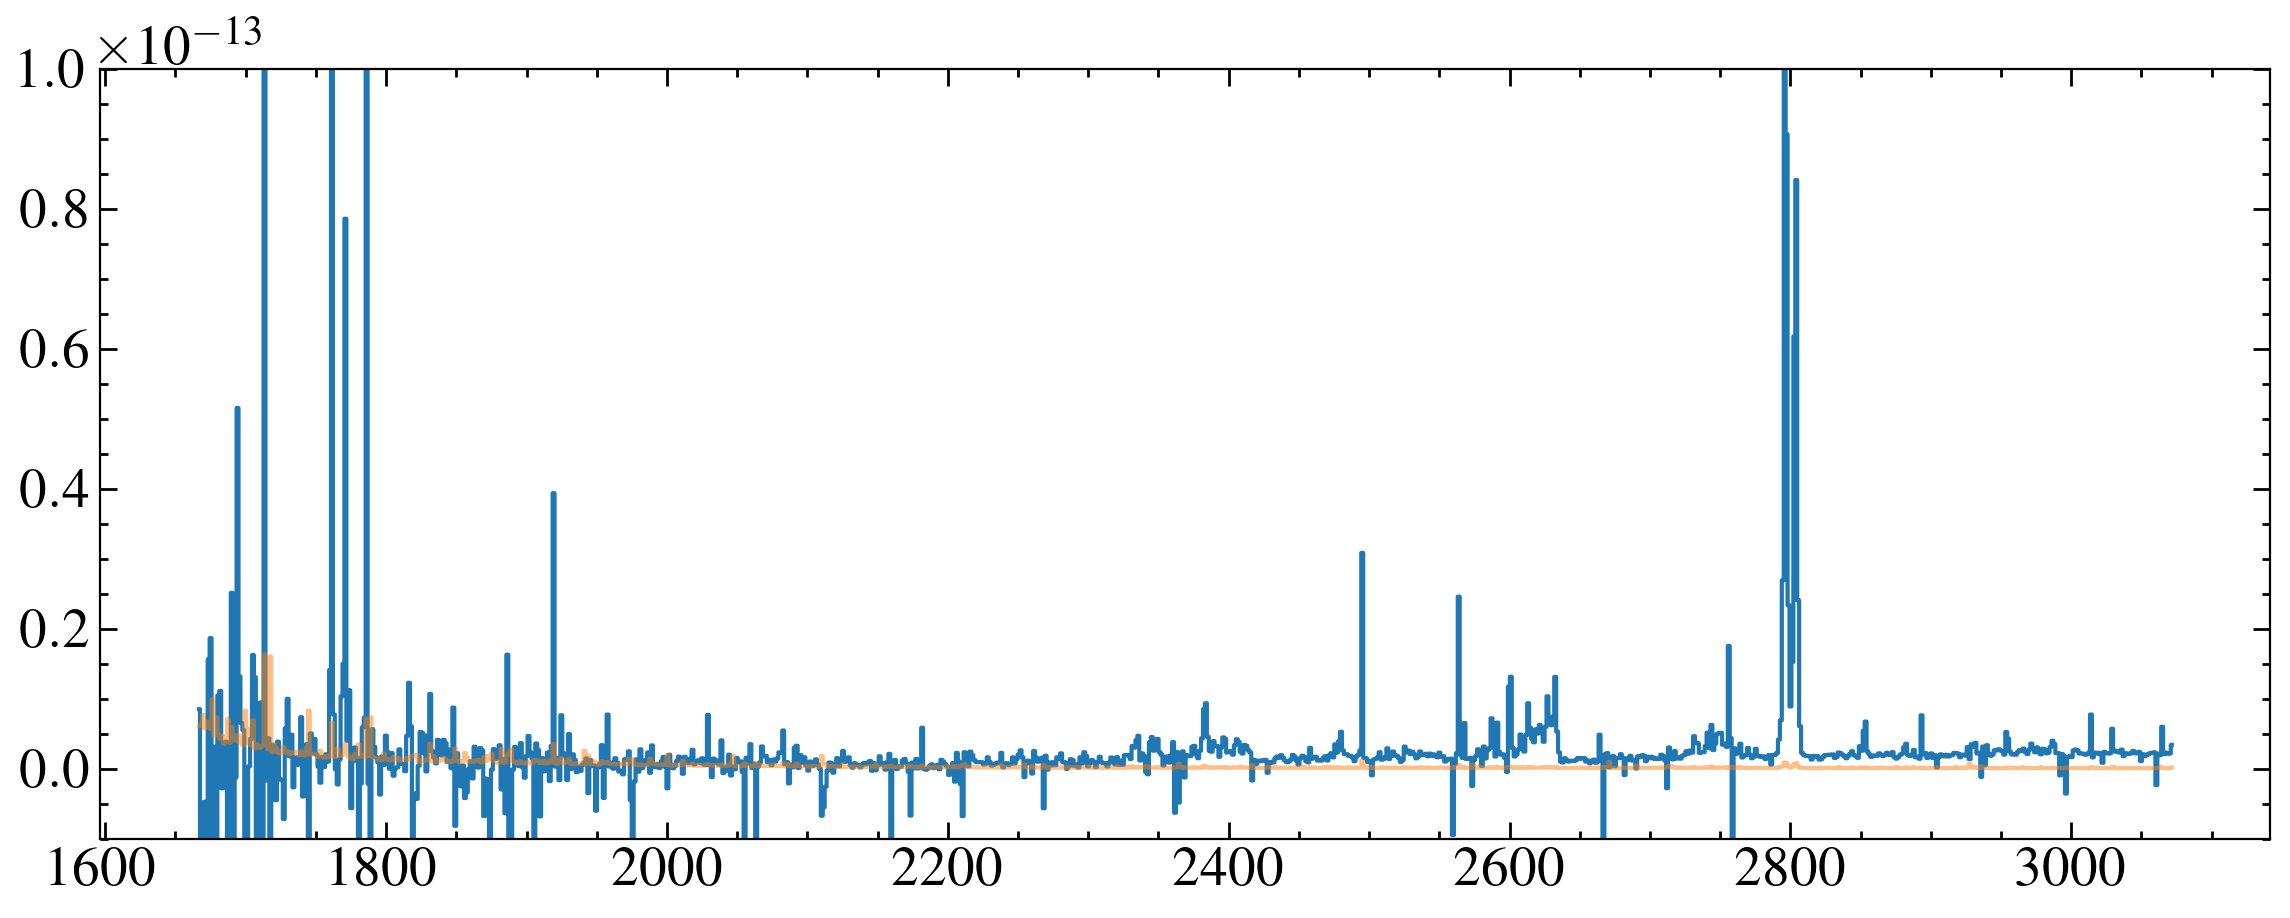

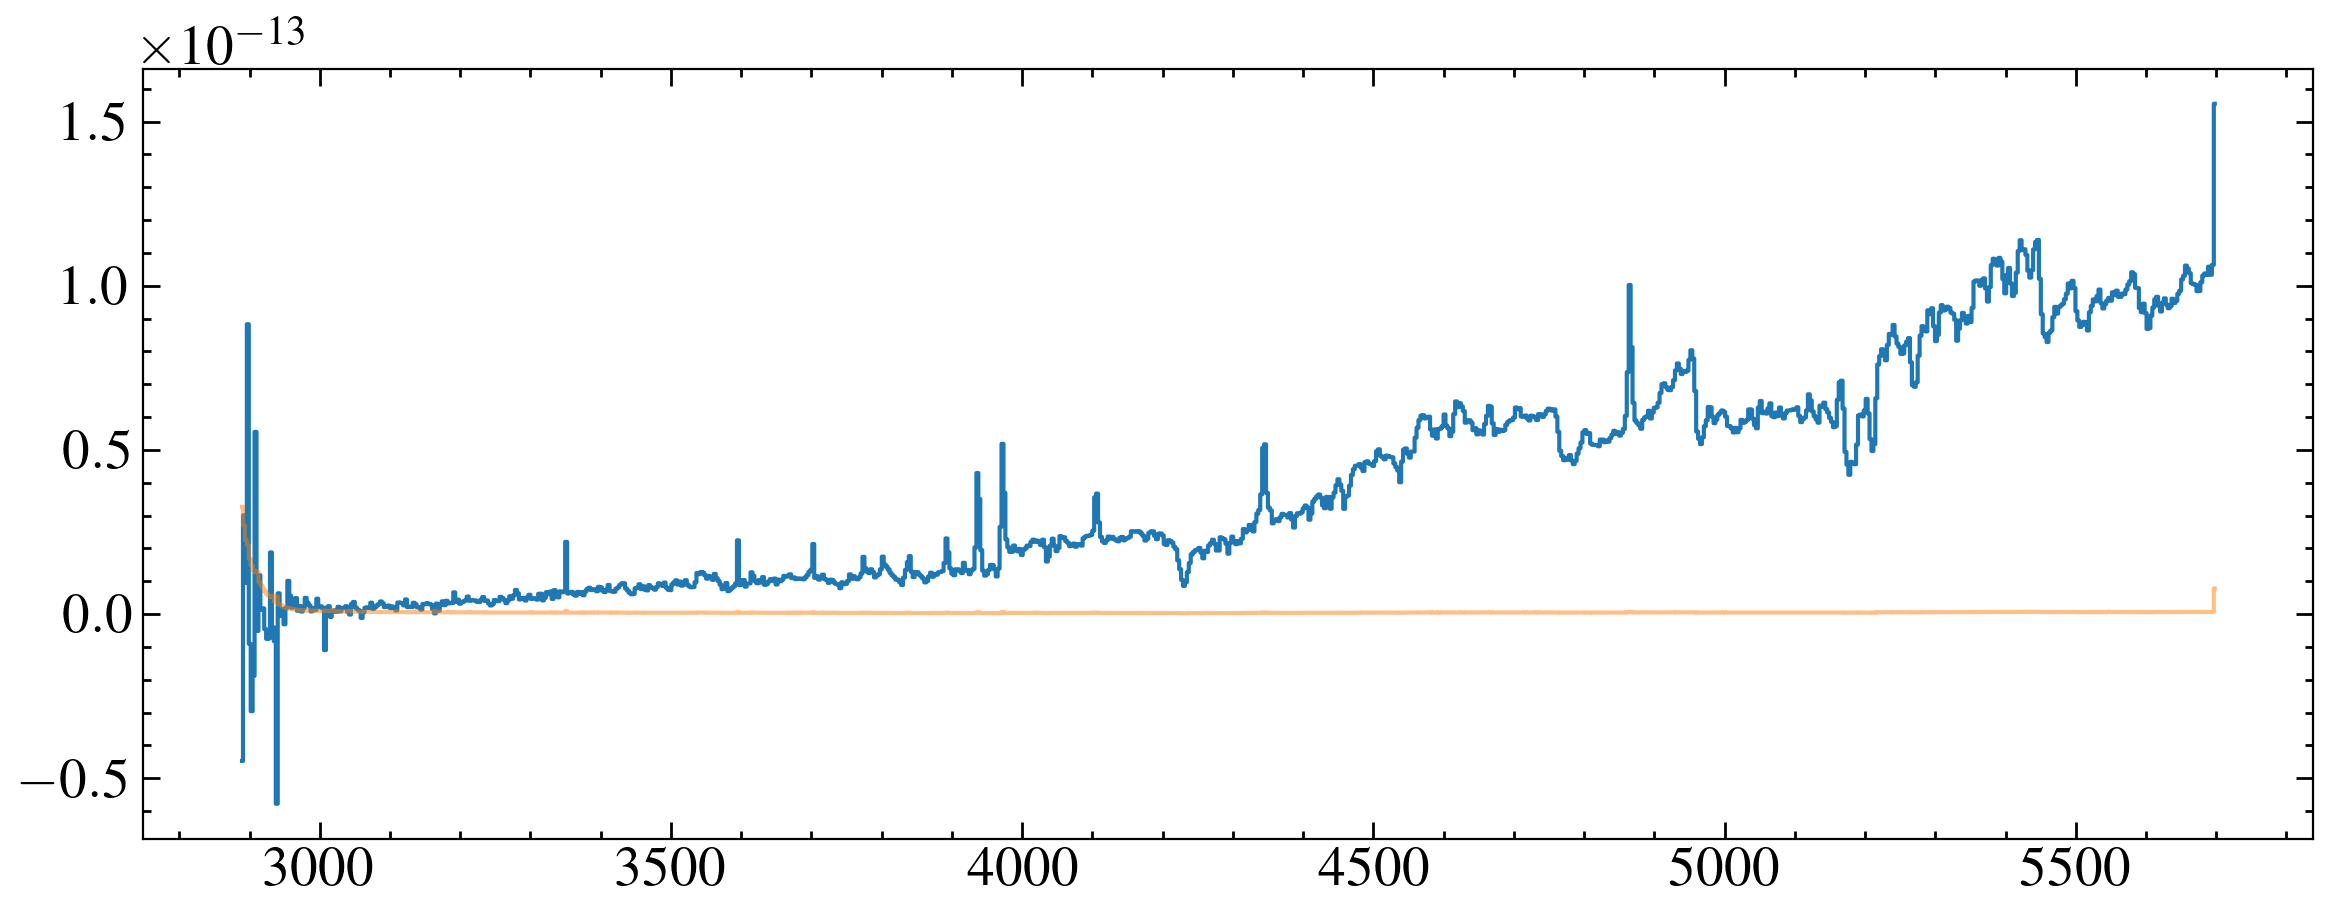

In [6]:
for x in sx1s:
    fig, ax = plt.subplots()
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    # print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # if grating in ['G140M', 'G140L']:
        # mask = (w > 1160)
        
        # plt.ylim(-1e-16, 1e-16)
        # plt.axhline(0, ls='--', c='0.5')
    # if grating =='G230L':
    #     mask = (w > 1700)
    # if grating =='G430L':
    #     mask = (w > 3000)
    
    # w, f, e = w[mask], f[mask], e[mask]
    ax.step(w, f, where='mid')
    ax.step(w, e, where='mid', alpha=0.5)

    if grating == 'G230LB':
        ax.set_ylim(-1e-14, 1e-13)
    # plt.show()

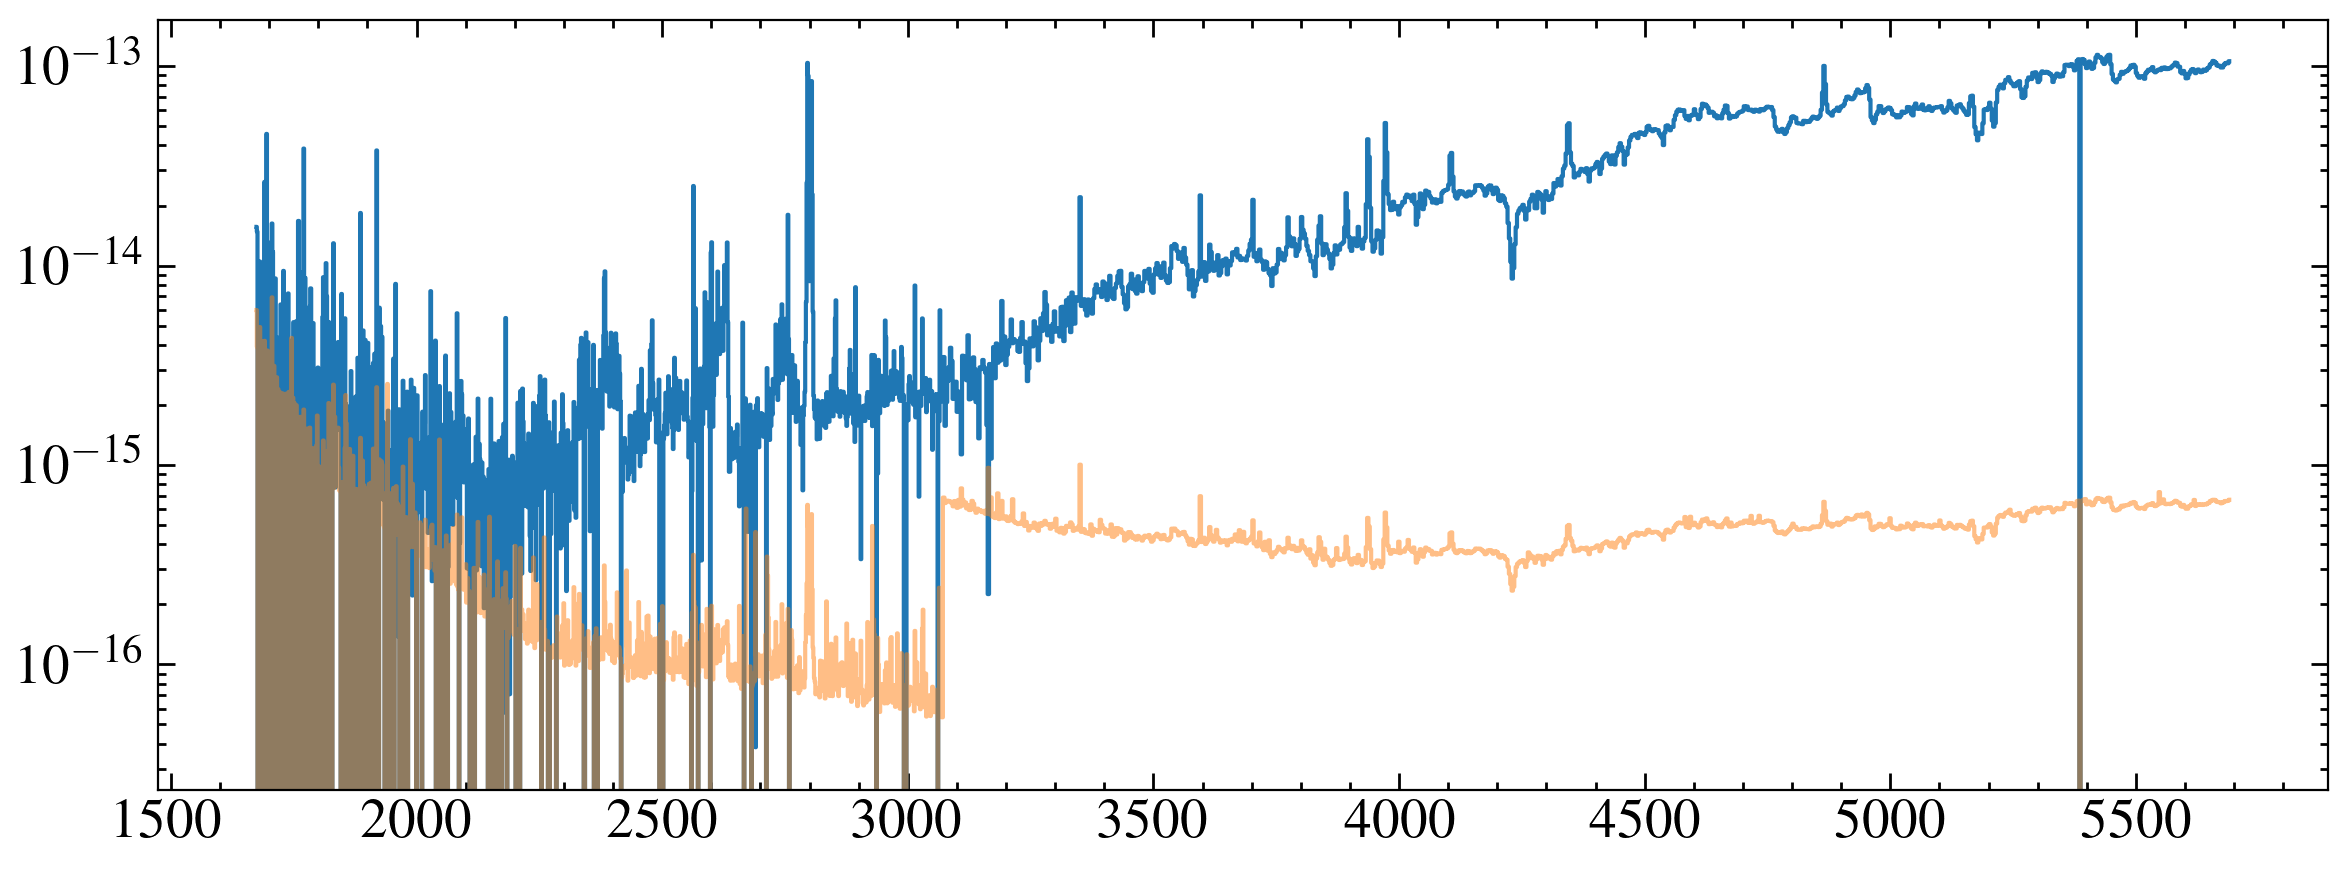

In [11]:
fig, ax = plt.subplots()

data = fits.getdata(cspecs[1], 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

mask = f < 1.5e-13

w, f, e = w[mask], f[mask], e[mask]

ax.step(w, f, where='mid')
ax.step(w, e, where='mid', alpha=0.5)

ax.set_yscale('log')

moment of truth...

array([1500.49944305, 1501.49944305, 1502.49944305, ..., 5996.49944305,
       5997.49944305, 5998.49944305], shape=(4499,))

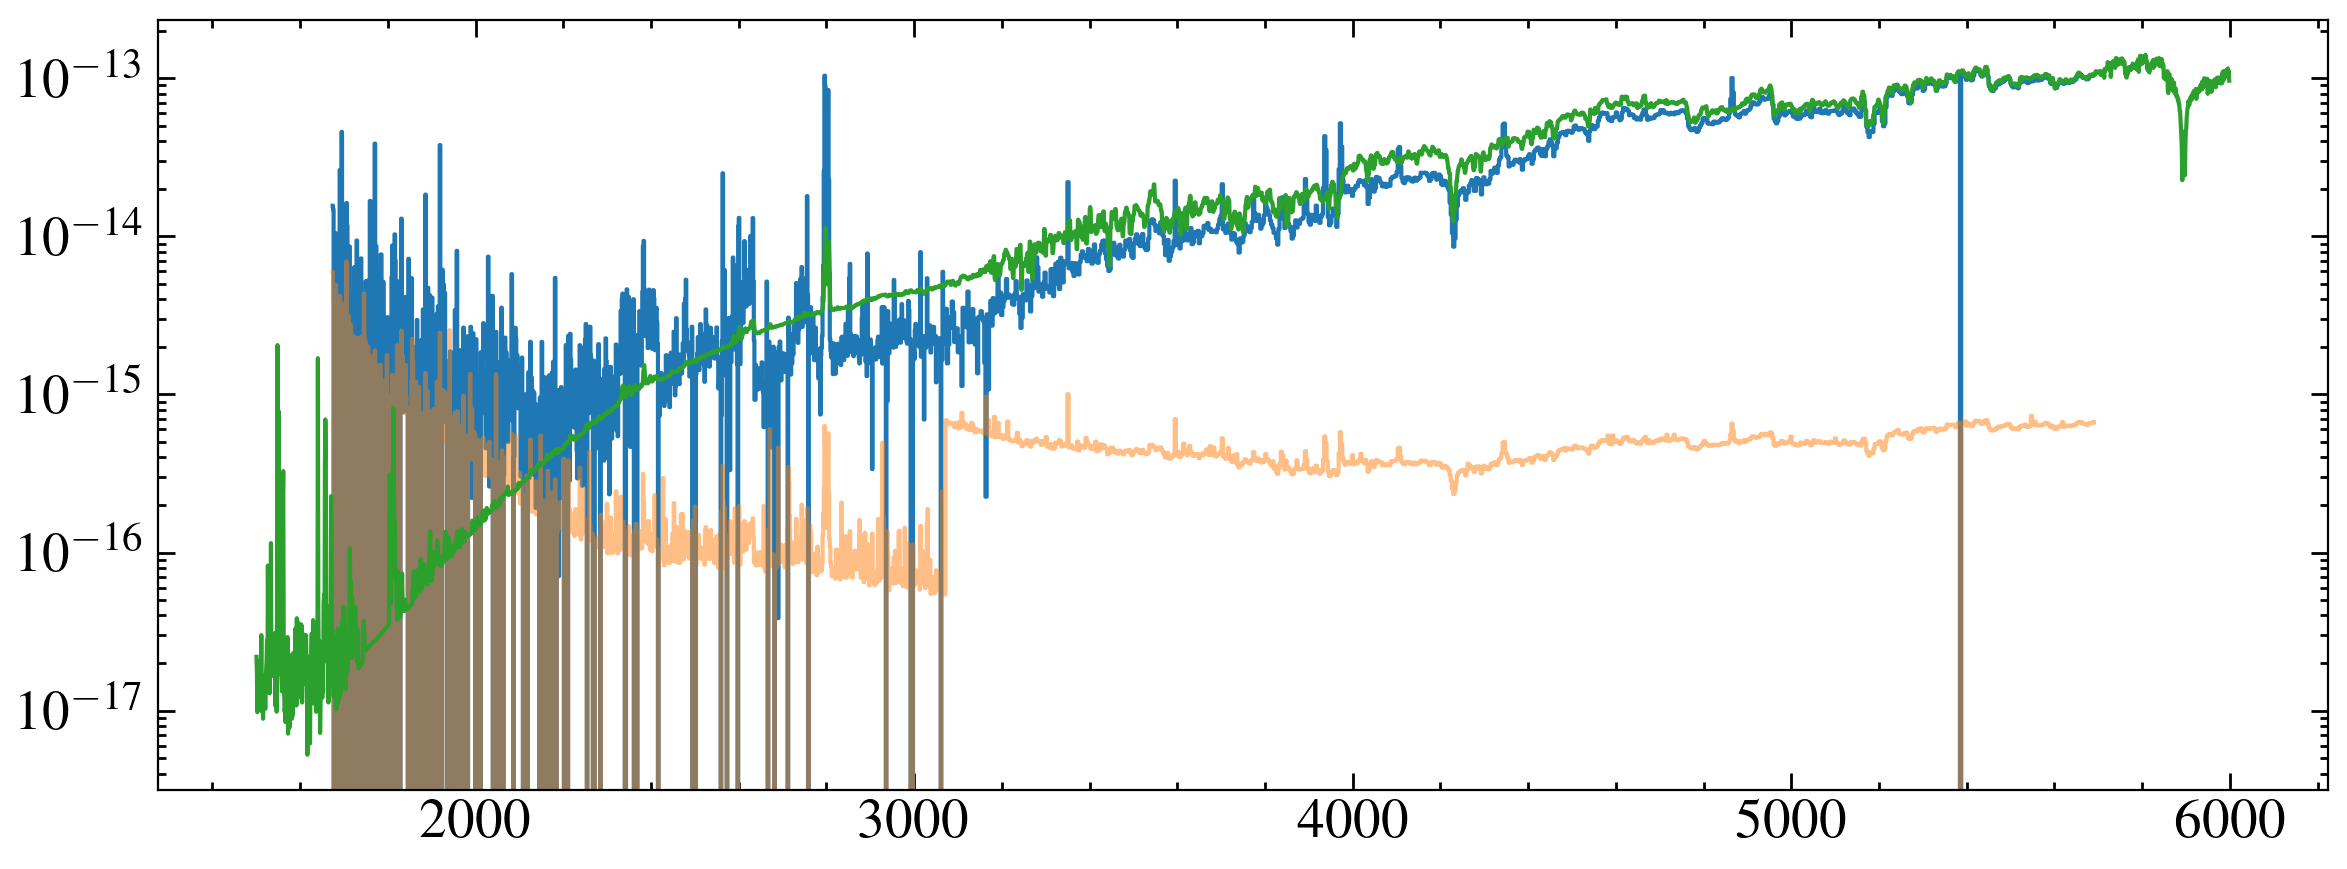

In [33]:
fig, ax = plt.subplots()

data = fits.getdata(cspecs[1], 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

mask = f < 1.5e-13

w, f, e = w[mask], f[mask], e[mask]

ax.step(w, f, where='mid')
ax.step(w, e, where='mid', alpha=0.5)

ax.set_yscale('log')
mw, mf = np.loadtxt('gj207_model.dat', unpack=True)

ax.plot(mw, mf)

Fainter than expected, scaling a bit

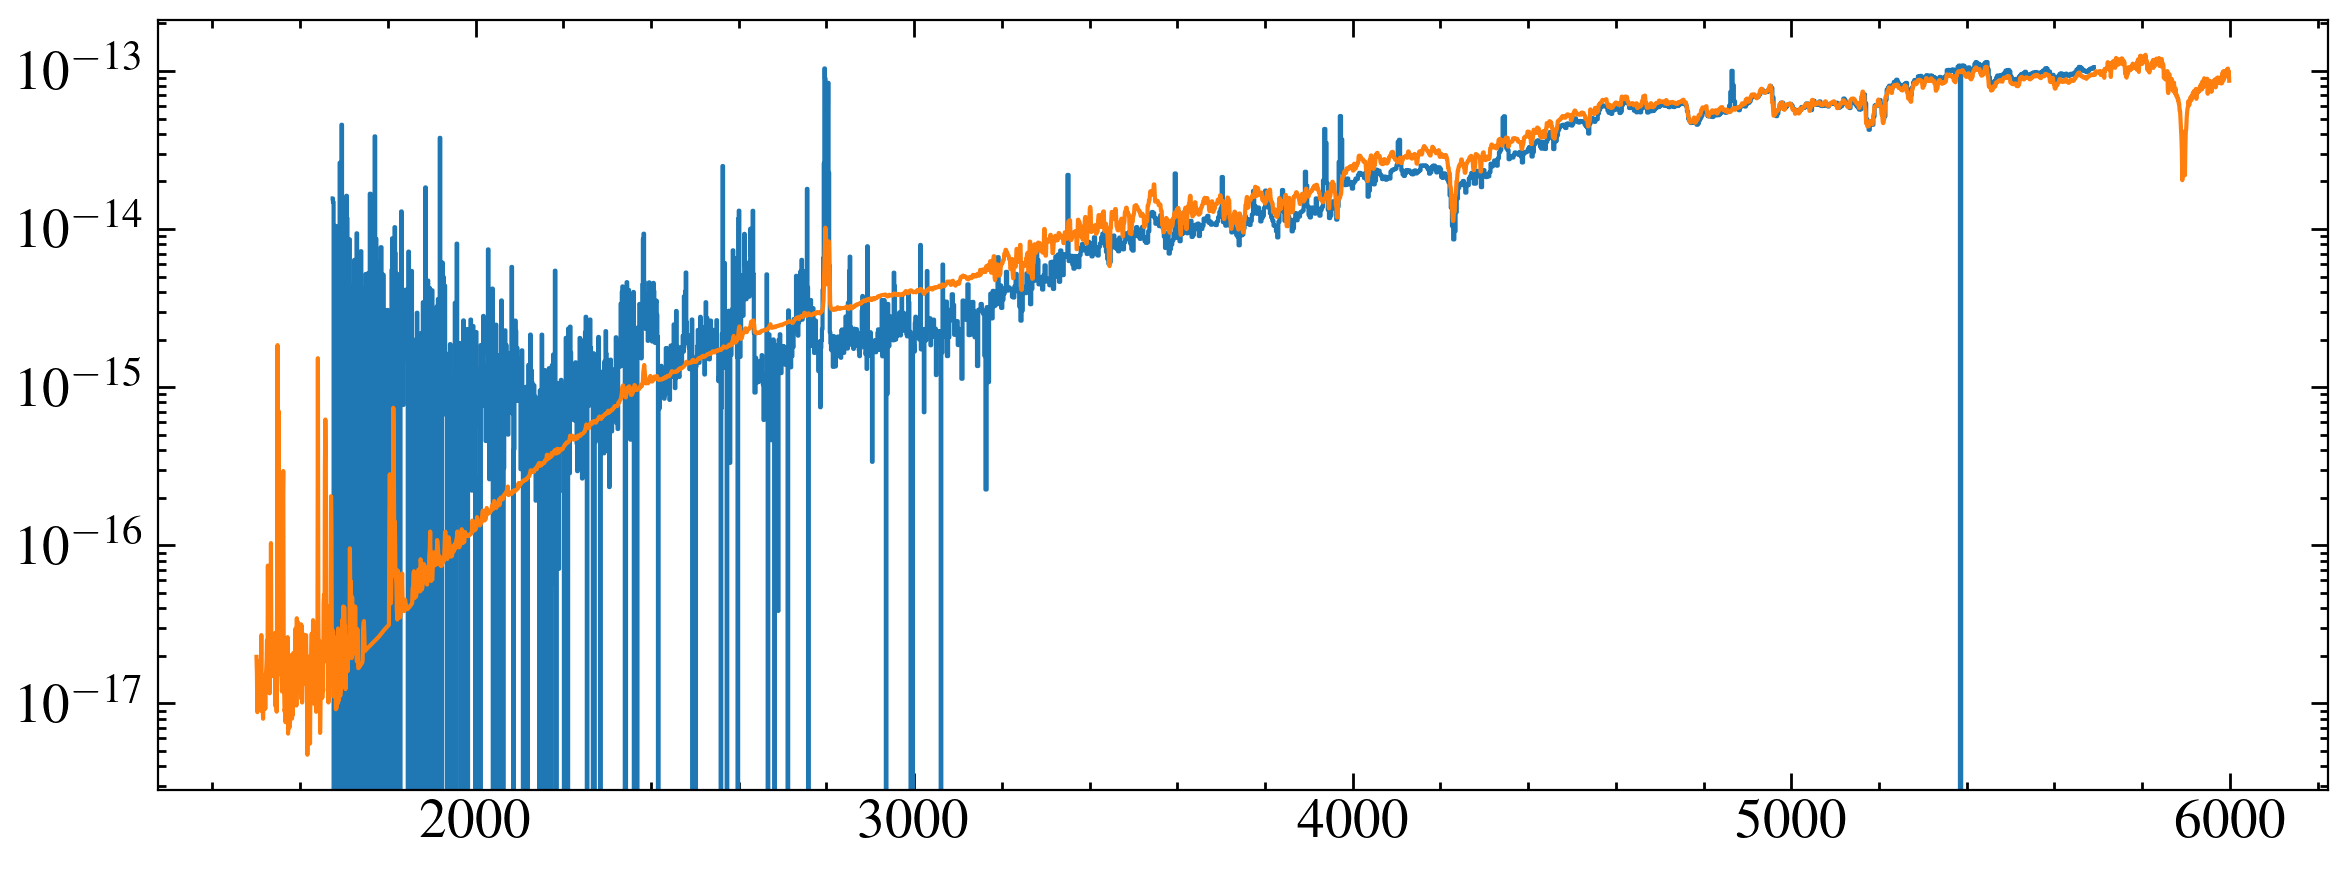

In [17]:
fig, ax = plt.subplots()


ax.step(w, f, where='mid')
# ax.step(w, e, where='mid', alpha=0.5)

ax.set_yscale('log')

ax.plot(mw, mf*0.9)

So a cooler white dwarf component?

In [19]:
pdata = fits.getdata('{}../../gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits'.format(path))
# data = fits.getdata('{}/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits'.format(path))
gw, gf = pdata['WAVELENGTH'], pdata['FLUX']

In [20]:
d_gj176 = 1/(105.42748417135273e-3)*u.pc
d_gj207 = 1/(63.35970667464679e-3)*u.pc
rwd = 0.0128*u.Rsun

gj_scale = (d_gj176/d_gj207)**2
wd_scale = (rwd.to(u.m)/d_gj207.to(u.m))**2

print(gj_scale, wd_scale)

0.36117578882221896 3.3434064163686346e-22


(2e-18, 2e-13)

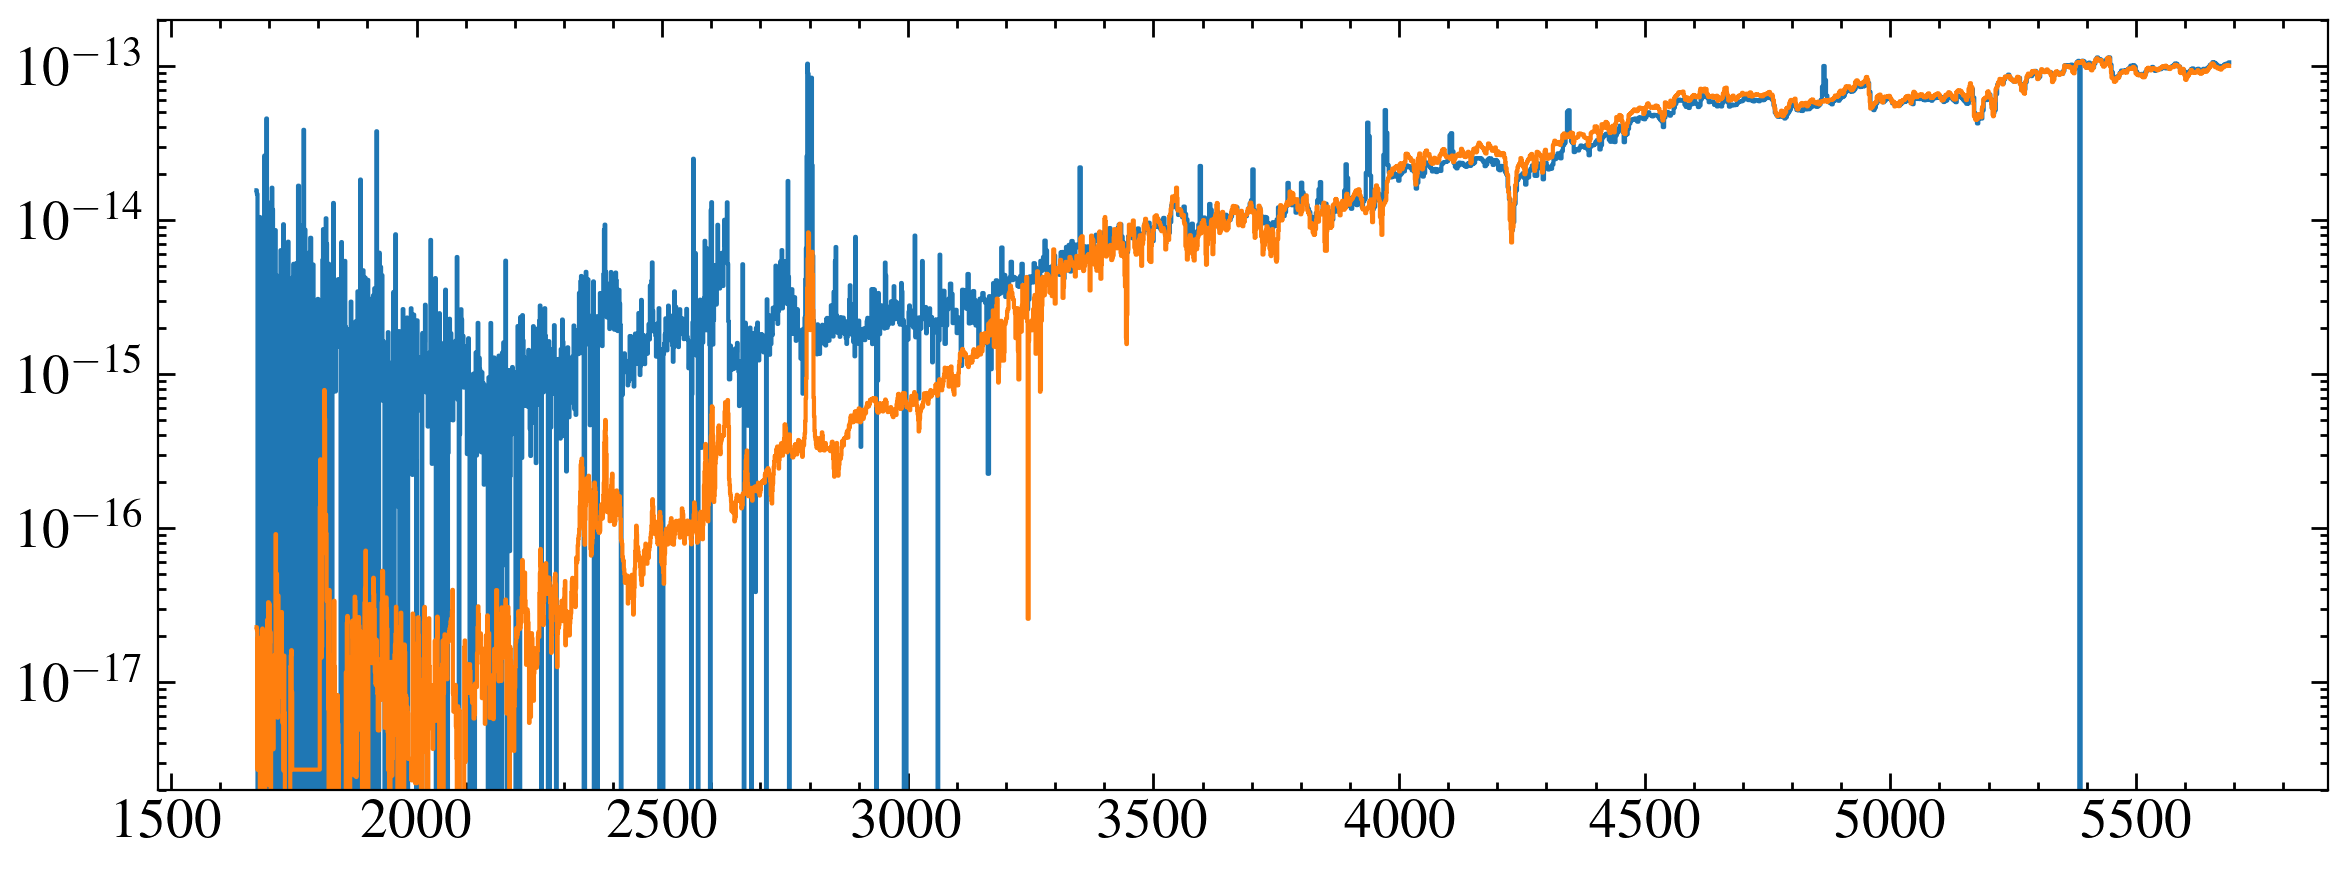

In [39]:
fig, ax = plt.subplots()


ax.step(w, f, where='mid')
# ax.step(w, e, where='mid', alpha=0.5)

gmask = (gw > w[0]) & (gw < w[-1])

scale2 = 1.4691682547408482 #from pt2 notebook 

ax.step(gw[gmask], gf[gmask]*gj_scale/scale2, where='mid')

ax.set_yscale('log')

ax.set_ylim(2e-18, 2e-13)

# ax.plot(mw, mf)

Check for significant differences

/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02010_sx1.fits
G230LB
/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02020_sx1.fits
G230LB


(2750.0, 2850.0)

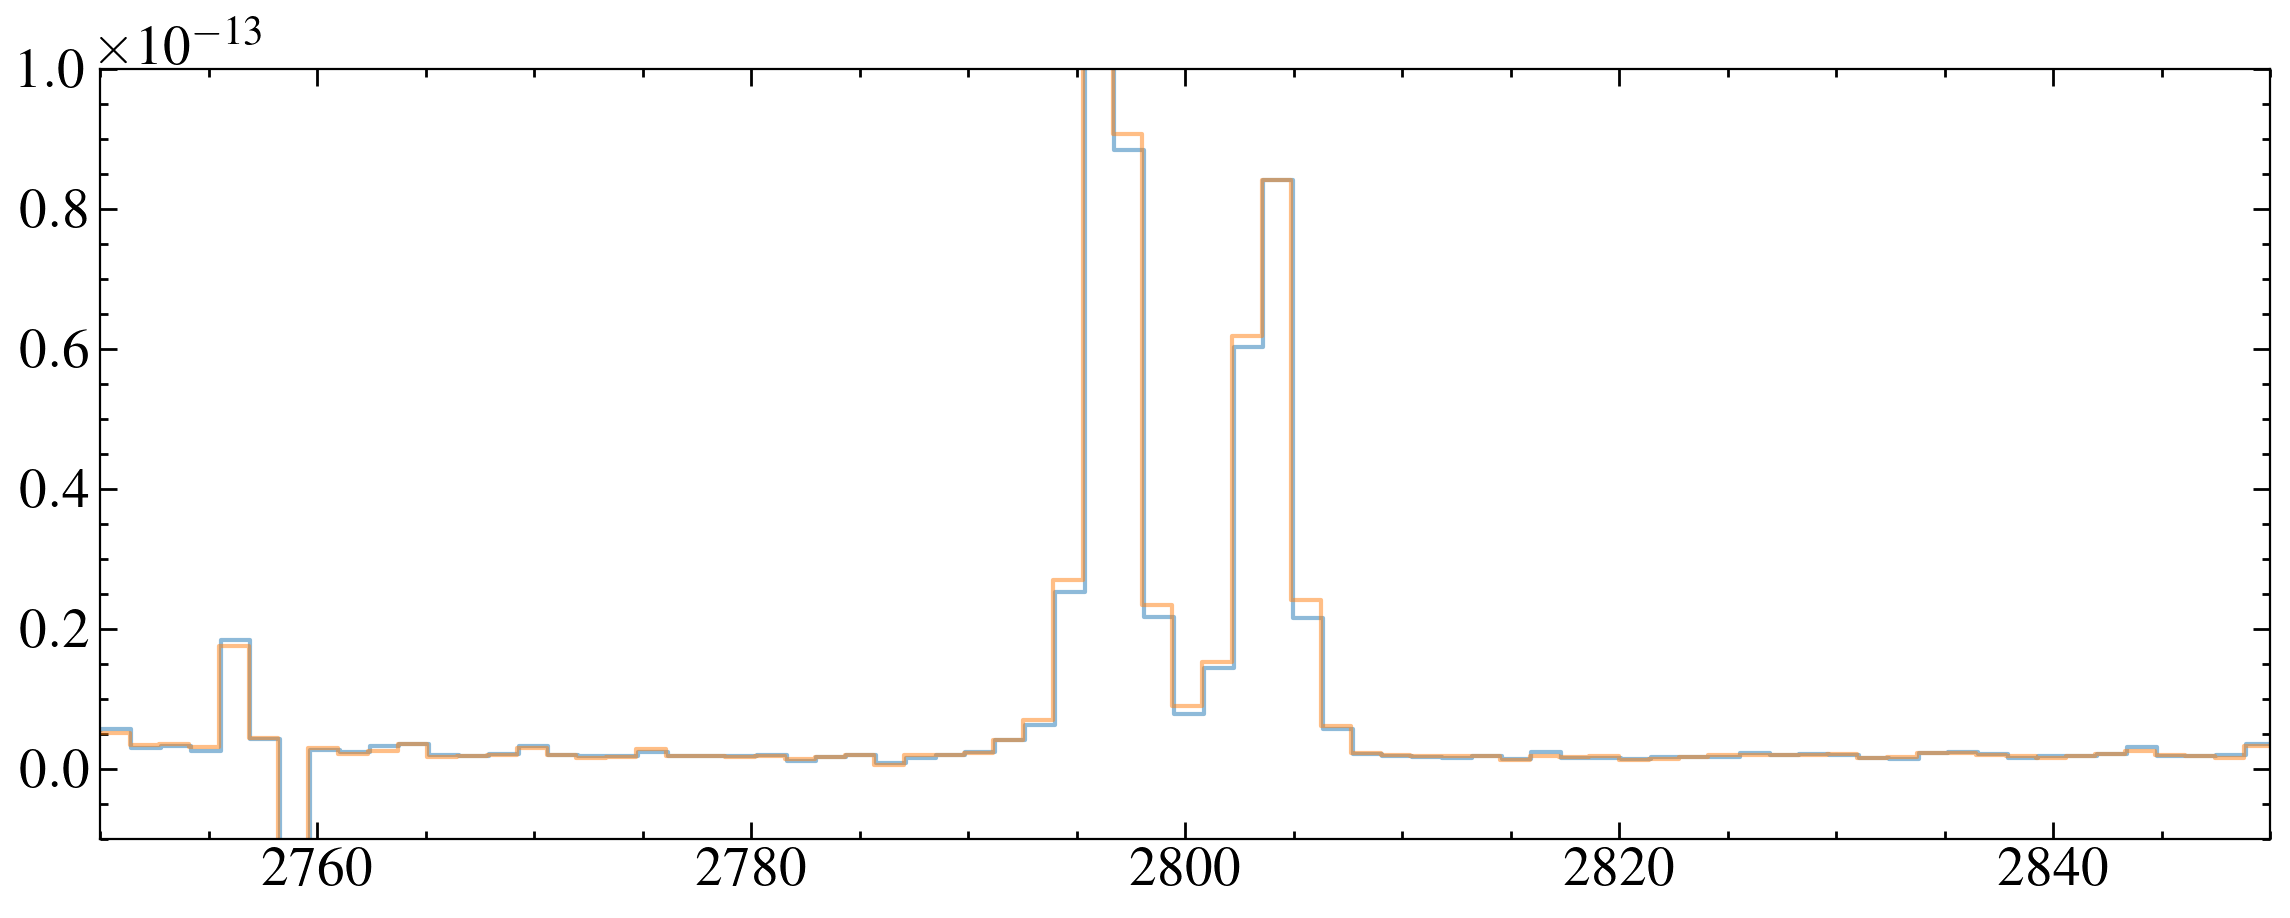

In [31]:
# fig, ax = plt.subplots()

# for x in sx1s[0:2]:
#     print(x)
#     grating = fits.getheader(x, 0)['OPT_ELEM'] 
#     print(grating)
#     data = fits.getdata(x, 1)[0]
#     # print(data['A2Center'])
#     w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     # if grating in ['G140M', 'G140L']:
#         # mask = (w > 1160)
        
#         # plt.ylim(-1e-16, 1e-16)
#         # plt.axhline(0, ls='--', c='0.5')
#     # if grating =='G230L':
#     #     mask = (w > 1700)
#     # if grating =='G430L':
#     #     mask = (w > 3000)
    
#     # w, f, e = w[mask], f[mask], e[mask]
#     ax.step(w, f, where='mid', alpha=0.5)
#     # ax.step(w, e, where='mid', alpha=0.5)

#     # if grating == 'G230LB':
# ax.set_ylim(-1e-14, 1e-13)
# # ax.set_xlim(2200, 3050)
# ax.set_xlim(2750, 2850)

UVOT fluxes

[1.2576399e-15] 1.56920904942379e-15 [0.80144828]
[3.5183853e-17] 1.0557802908380694e-17
[35.744804]


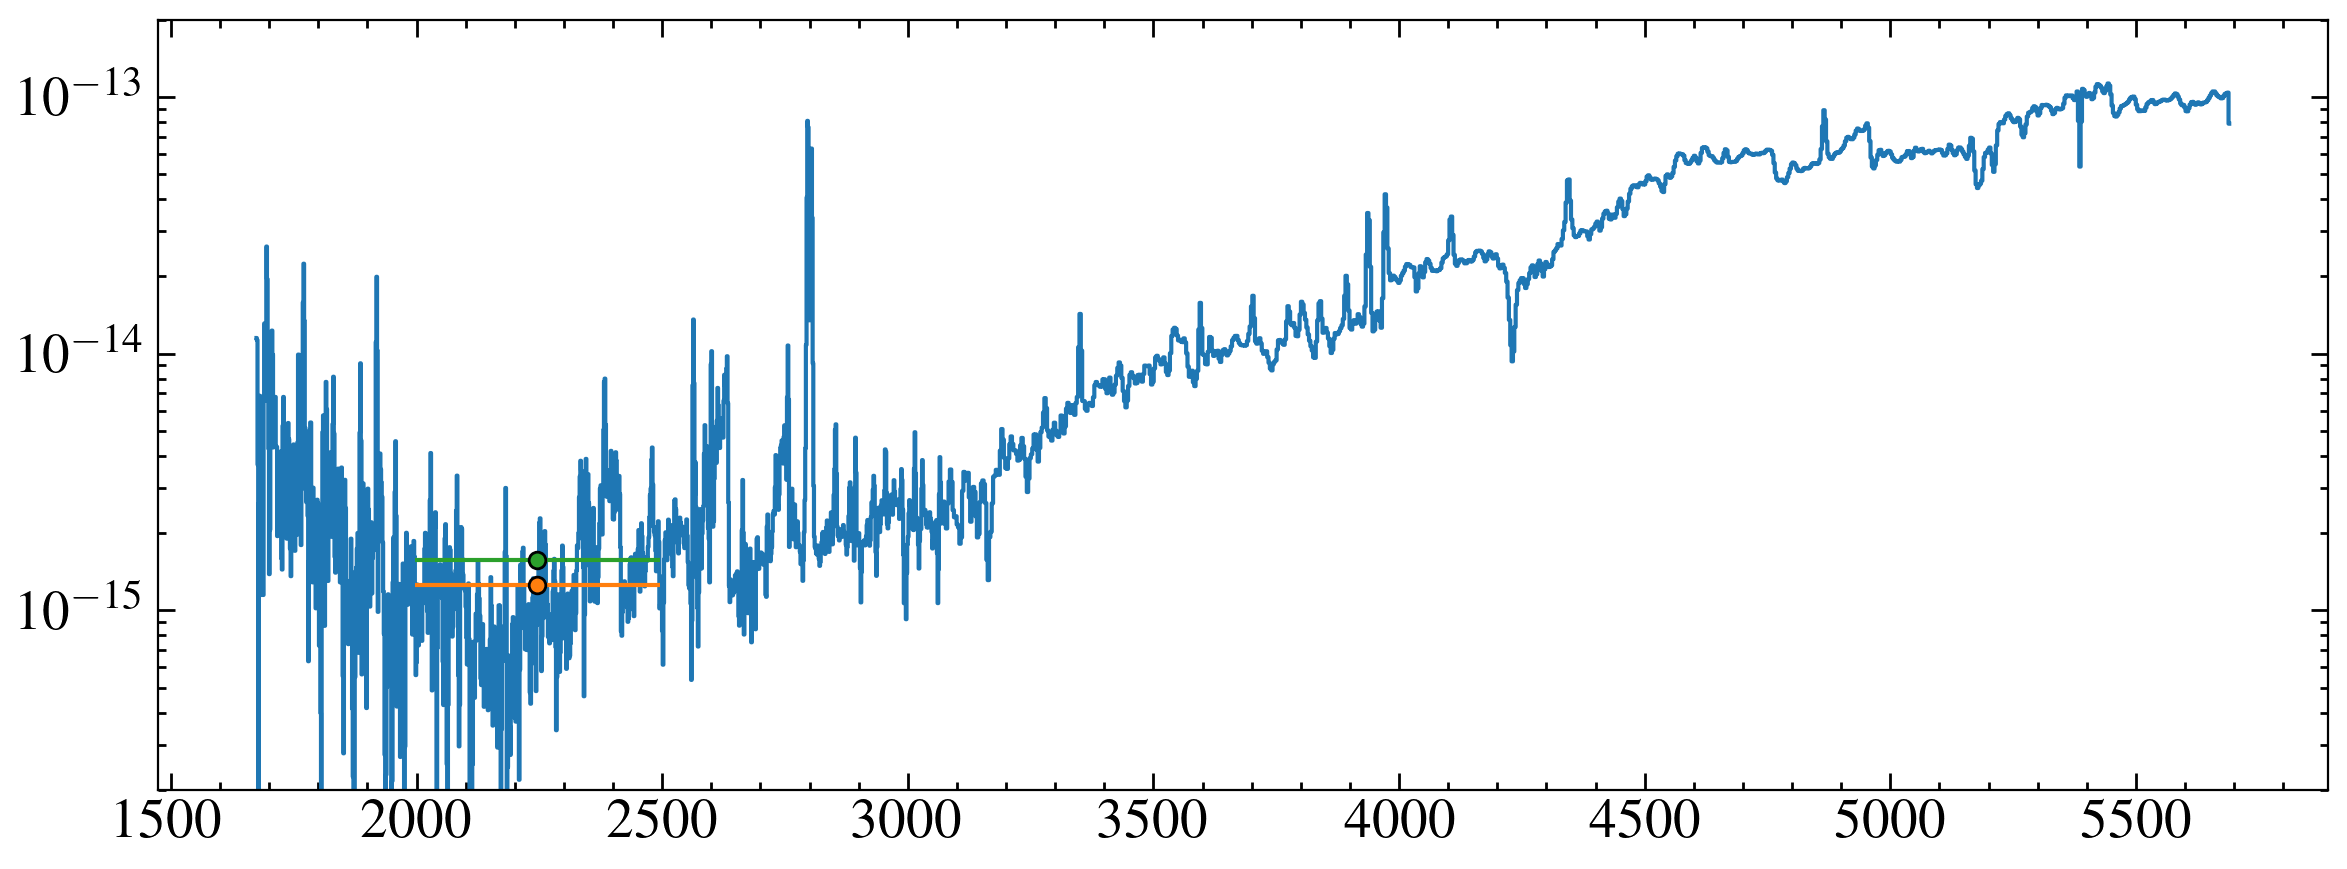

In [50]:
def make_phot(bp_w, bp_cc, w, f, e=0):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = np.interp(w, bp_w, bp_cc, left=0, right=0)
    flux = np.trapezoid(f*bb_cci, w)/np.trapezoid(bb_cci, w)
    if isinstance(e, int) != True:
        e = e[mask]
        intf = np.trapezoid(f, w)
        inte = (np.sum(e[1:]**2 * np.diff(w)**2))**0.5
        flux_error = (inte/intf)*flux
        return flux, flux_error
    else:
        return flux 
        
uvm2 = fits.getdata('/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/uvot/00014457003/uvot/products/gj207d1_uvm2_phot.fits',1)

uw = 2246
ufwhm =498
uf, ue = uvm2['AB_FLUX_AA'], uvm2['AB_FLUX_AA_ERR']


fig, ax = plt.subplots()

fi = convolve(f, Box1DKernel(2))
ax.step(w, fi, where='mid')

# gmask = (gw > w[0]) & (gw < w[-1])
# ax.step(gw[gmask], gf[gmask]*gj_scale/scale2, where='mid')

ax.set_yscale('log')

ax.set_ylim(2e-16, 2e-13)

ax.errorbar(uw, uf, yerr=ue, xerr=ufwhm/2, marker='o', ls='none', markeredgecolor='k')
# ax.plot(mw, mf)

bp_w, bp_cc = np.loadtxt('/home/david/work/filters/uvot/Swift_UVOT.UVM2.dat', unpack=True)
simphot, simphot_e = make_phot(bp_w, bp_cc, w, f, e=e)


ax.errorbar(uw, simphot, yerr=simphot_e, xerr=ufwhm/2, marker='o', ls='none', markeredgecolor='k')

print(uf, simphot, uf/simphot)
print(ue, simphot_e)
print(uf/ue)


    # ax1.plot(bp_w, bp_cc, ls='--', c='C2')
    #     ax1.fill_between(bp_w, bp_cc, alpha=0.3, color='C2')
    #     ax1.annotate(r'${}$'.format(flt), (phot_w[psmask][i].value, 0.2), alpha=0.5)
    # flts.append(flt)
    
 


So maybe a touch of red leak. Wait until the final Swift data, but can use it to fit the equation from https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/stis/documentation/instrument-science-reports/_documents/2022_05.pdf

/tmp/ipykernel_294572/2423513856.py:3: RuntimeWarning: invalid value encountered in divide
  sn = convolve(f/e, Box1DKernel(5))


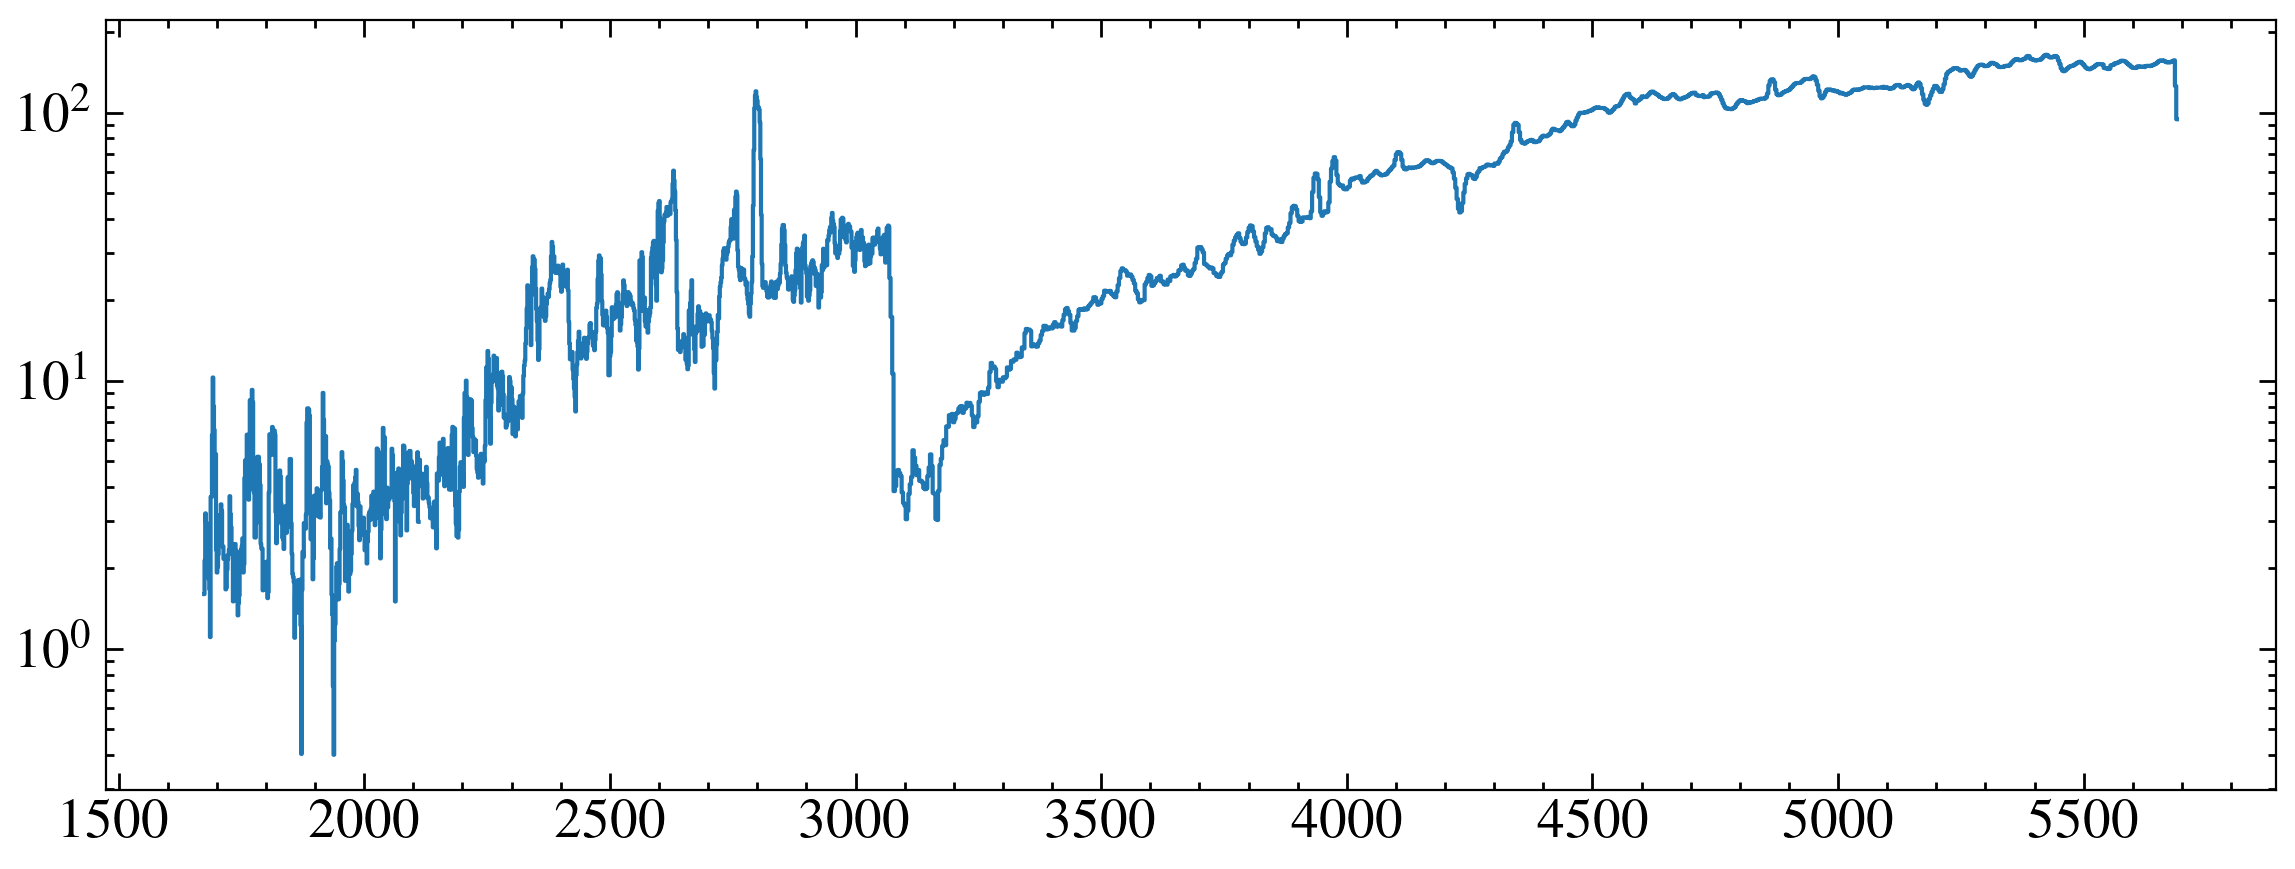

In [54]:
fig, ax = plt.subplots()

sn = convolve(f/e, Box1DKernel(5))

ax.step(w, sn, where='mid')

ax.set_yscale('log')

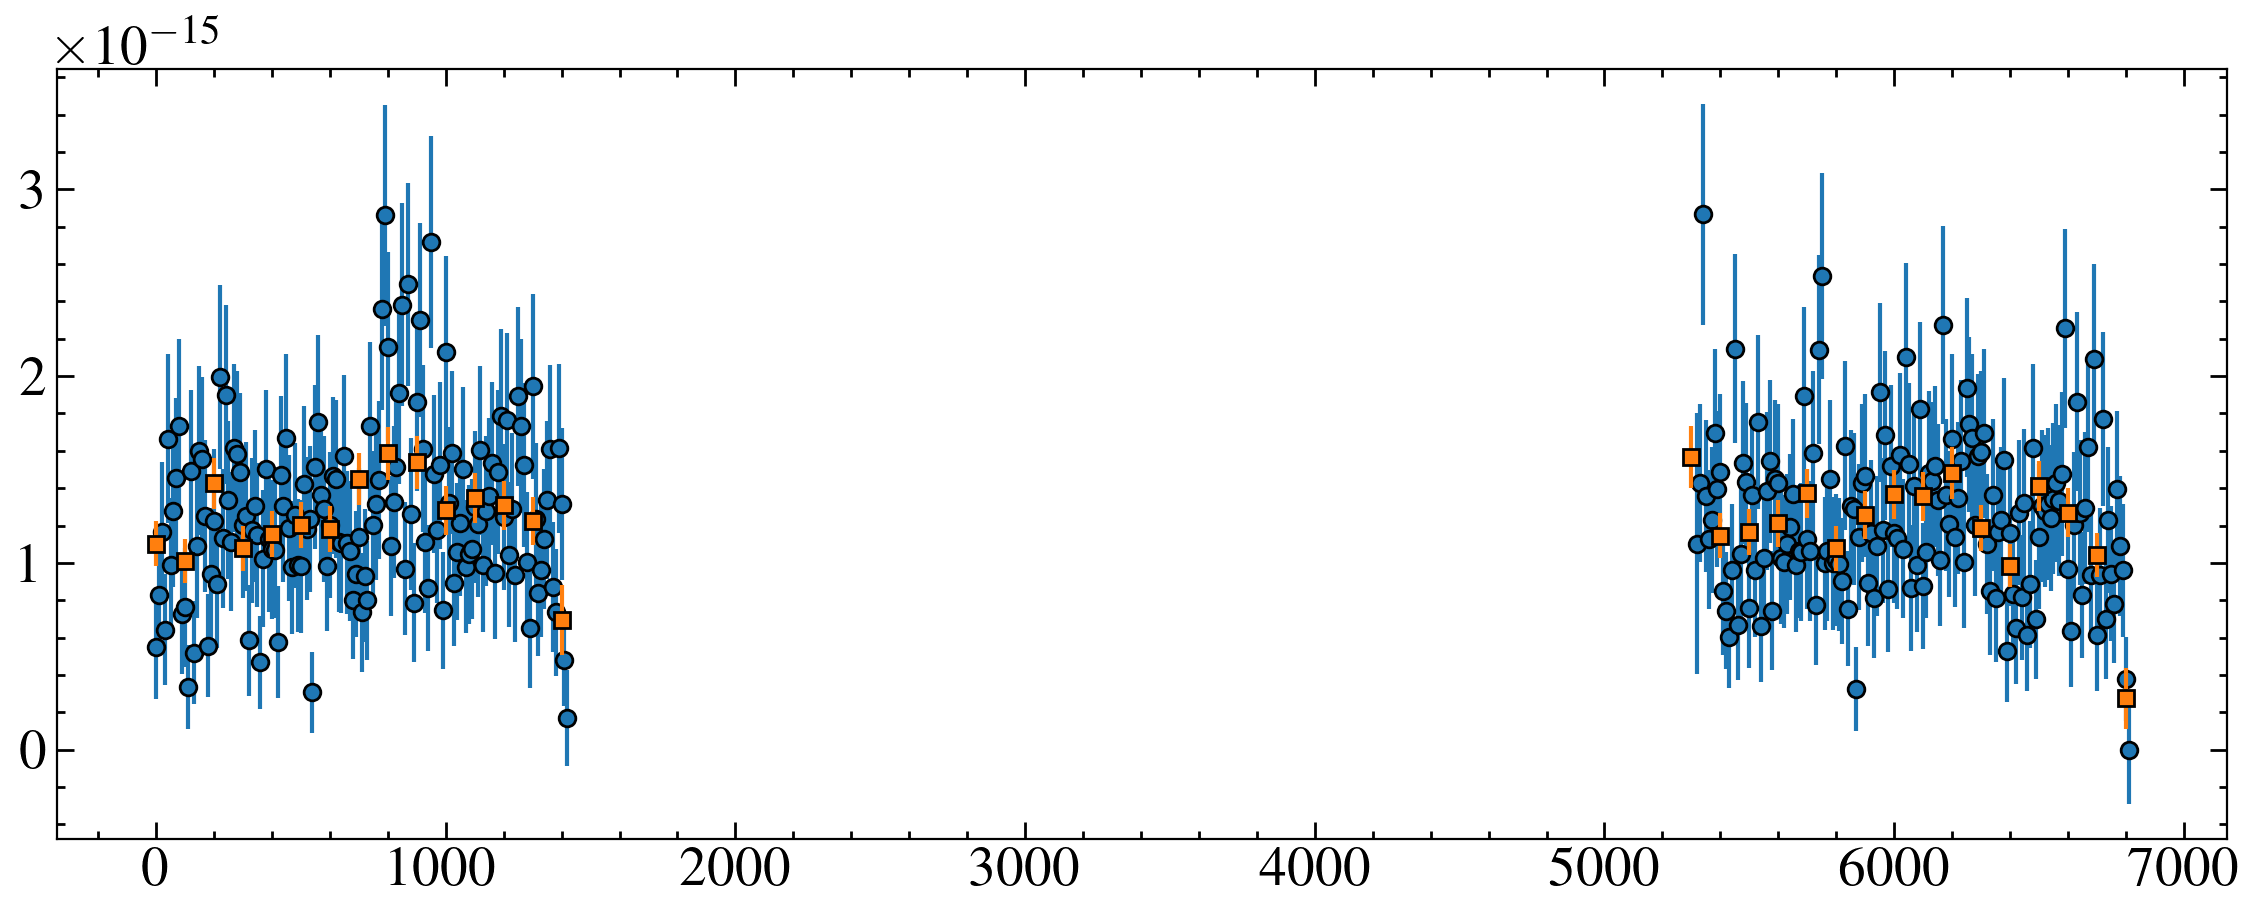

In [70]:
lcpath = '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/uvot/00014457003/uvot/event/'
lcs = glob.glob('{}gj207*'.format(lcpath))

ref_mjd = 51910
ref_sec = ref_mjd * 86400

m = ['o', 's']
zorders = [-10, 10]
fig, ax = plt.subplots()
for i,  lc in enumerate(lcs[::-1]):
    data = fits.getdata(lc, 1)
    ax.errorbar(data['TIME']-data['TIME'][0], data['AB_FLUX_AA'], yerr = data['AB_FLUX_AA_ERR'], marker=m[i], ls='none', markeredgecolor='k', zorder=zorders[i])


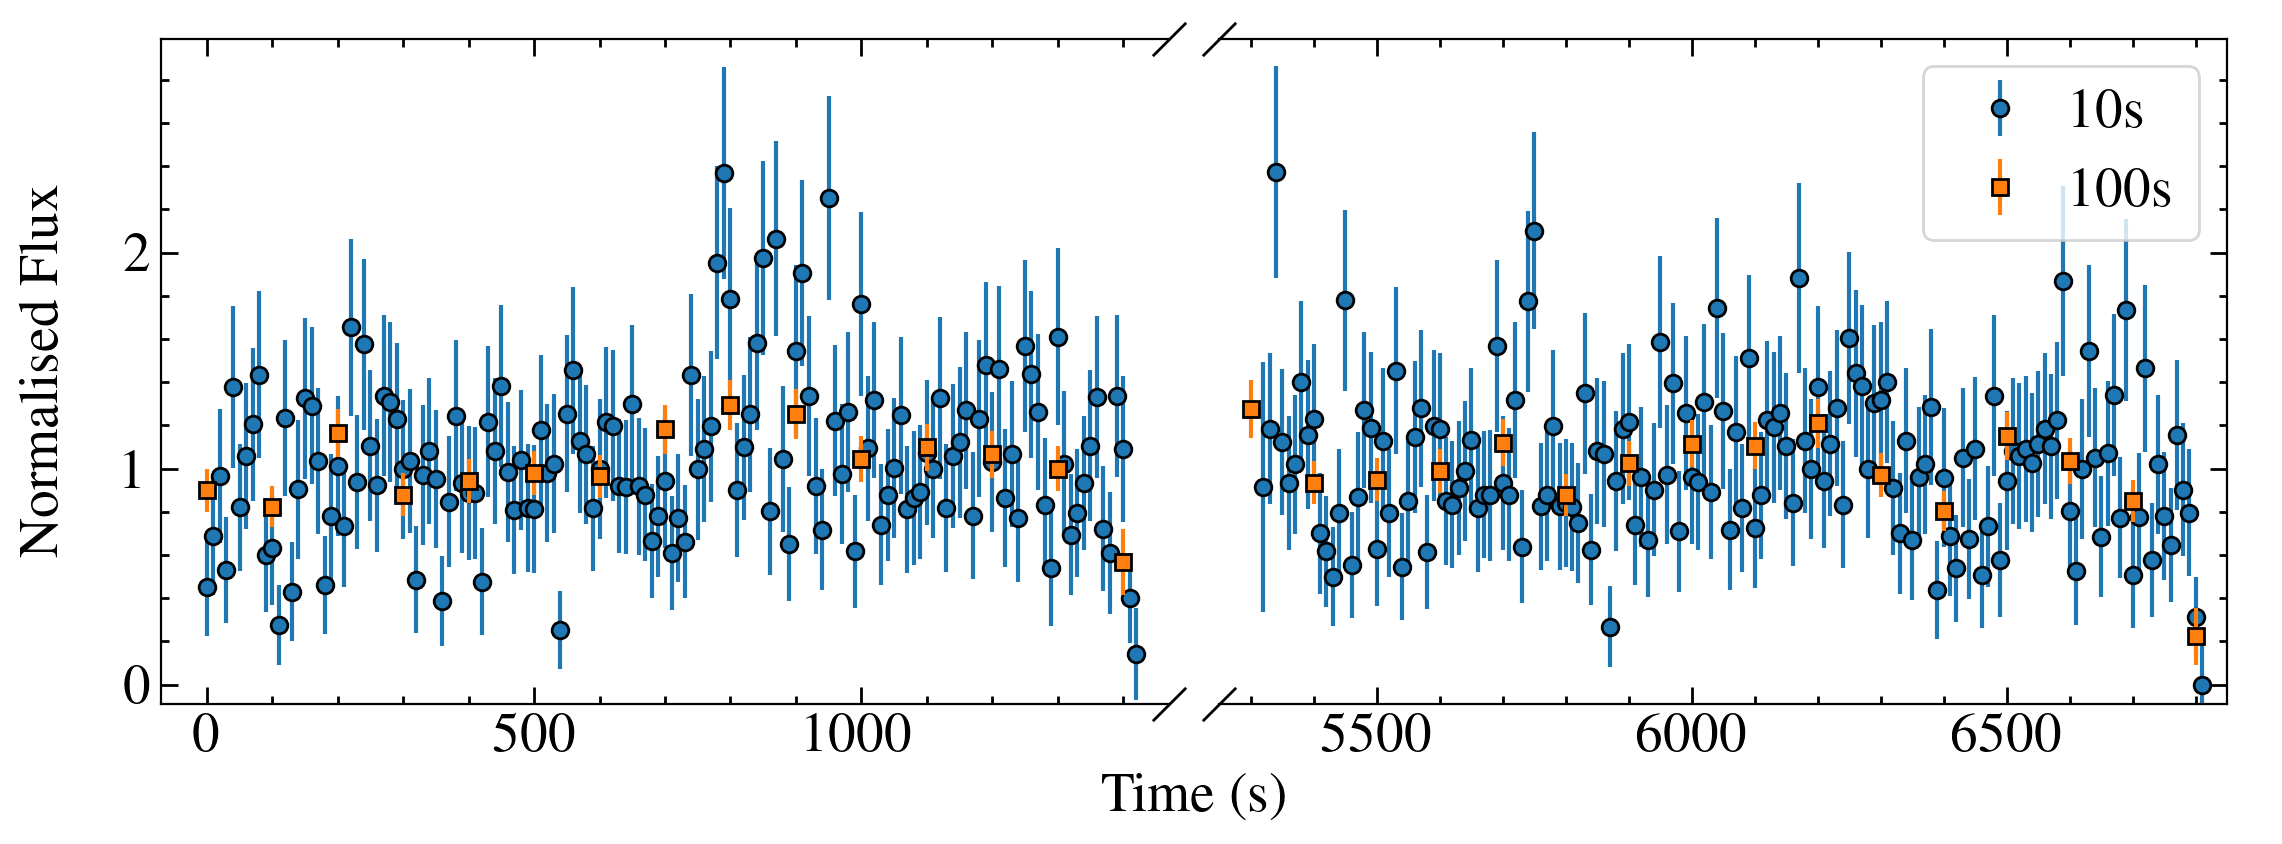

In [82]:
fig, axes = plt.subplots(ncols=2, sharey = True, figsize=(12, 5)) 



m = ['o', 's']
zorders = [-10, 10]
labels = ['10s', '100s']

for i,  lc in enumerate(lcs[::-1]):
    for j in range(len(axes)):
    
        data = fits.getdata(lc, 1)
        # ts, flc, elc = data['TIME'][:-2]-data['TIME'][0], data['AB_FLUX_AA'][:-2], data['AB_FLUX_AA_ERR'][:-2]
        ts, flc, elc = data['TIME']-data['TIME'][0], data['AB_FLUX_AA'], data['AB_FLUX_AA_ERR']
        flcn, elcn = flc/np.median(flc), elc/np.median(flc)
        axes[j].errorbar(ts, flcn, yerr = elcn, marker=m[i], ls='none', markeredgecolor='k', zorder=zorders[i], label=labels[i])


axes[0].set_ylim(-0.09, 2.99) # should only need to set the ylims on the first subplot because sharey = True
axes[0].set_xlim(-70, 1470) #setting up the ranges that the plots will cover. One row per subplot
axes[1].set_xlim(5250, 6850)

axes[1].legend(frameon=True)

"""
Everything between here and the next docstring should work regardless of how many subplots you have
"""

#setting up the slanted lines
d = 1.  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

for i in range(len(axes)):
    
    # axes[i].scatter(xs, ys, edgecolor='k') #add the points to each plot
    
    if i > 0: #turn off yticks for everything except the first plot
        axes[i].yaxis.set_tick_params(labelleft=False)
      
    if i != len(axes)-1: #do these things for every subplot exept the last
        axes[i].spines.right.set_visible(False) #turn off right ax
        axes[i].tick_params(right = False, which='both') #turn off right ticks
        axes[i].plot([1, 1], [0, 1], transform=axes[i].transAxes, **kwargs) #add the slanted line to the right corners
   
    if i > 0: #do these things for every subplot except the first
        axes[i].spines.left.set_visible(False) #as for the last loop but for the left
        axes[i].tick_params(left = False, which='both')
        axes[i].plot([0, 0], [1, 0], transform=axes[i].transAxes, **kwargs)
        
"""
Just the axes labels beyond this.
"""

    
#add a frame that goes around all the subplots to add the labels       
bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Normalised Flux') #change labelpad if the label is overlapping the tick labels
bigax.set_xlabel('Time (s)')
# bigax.set_title('Example plot with split x axis', pad =15) 

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) #change the gap in between the subplots


In [128]:
lcs

['/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/uvot/00014457003/uvot/event/gj207d1_uvm2_100s.fits',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/uvot/00014457003/uvot/event/gj207d1_uvm2_10s.fits']

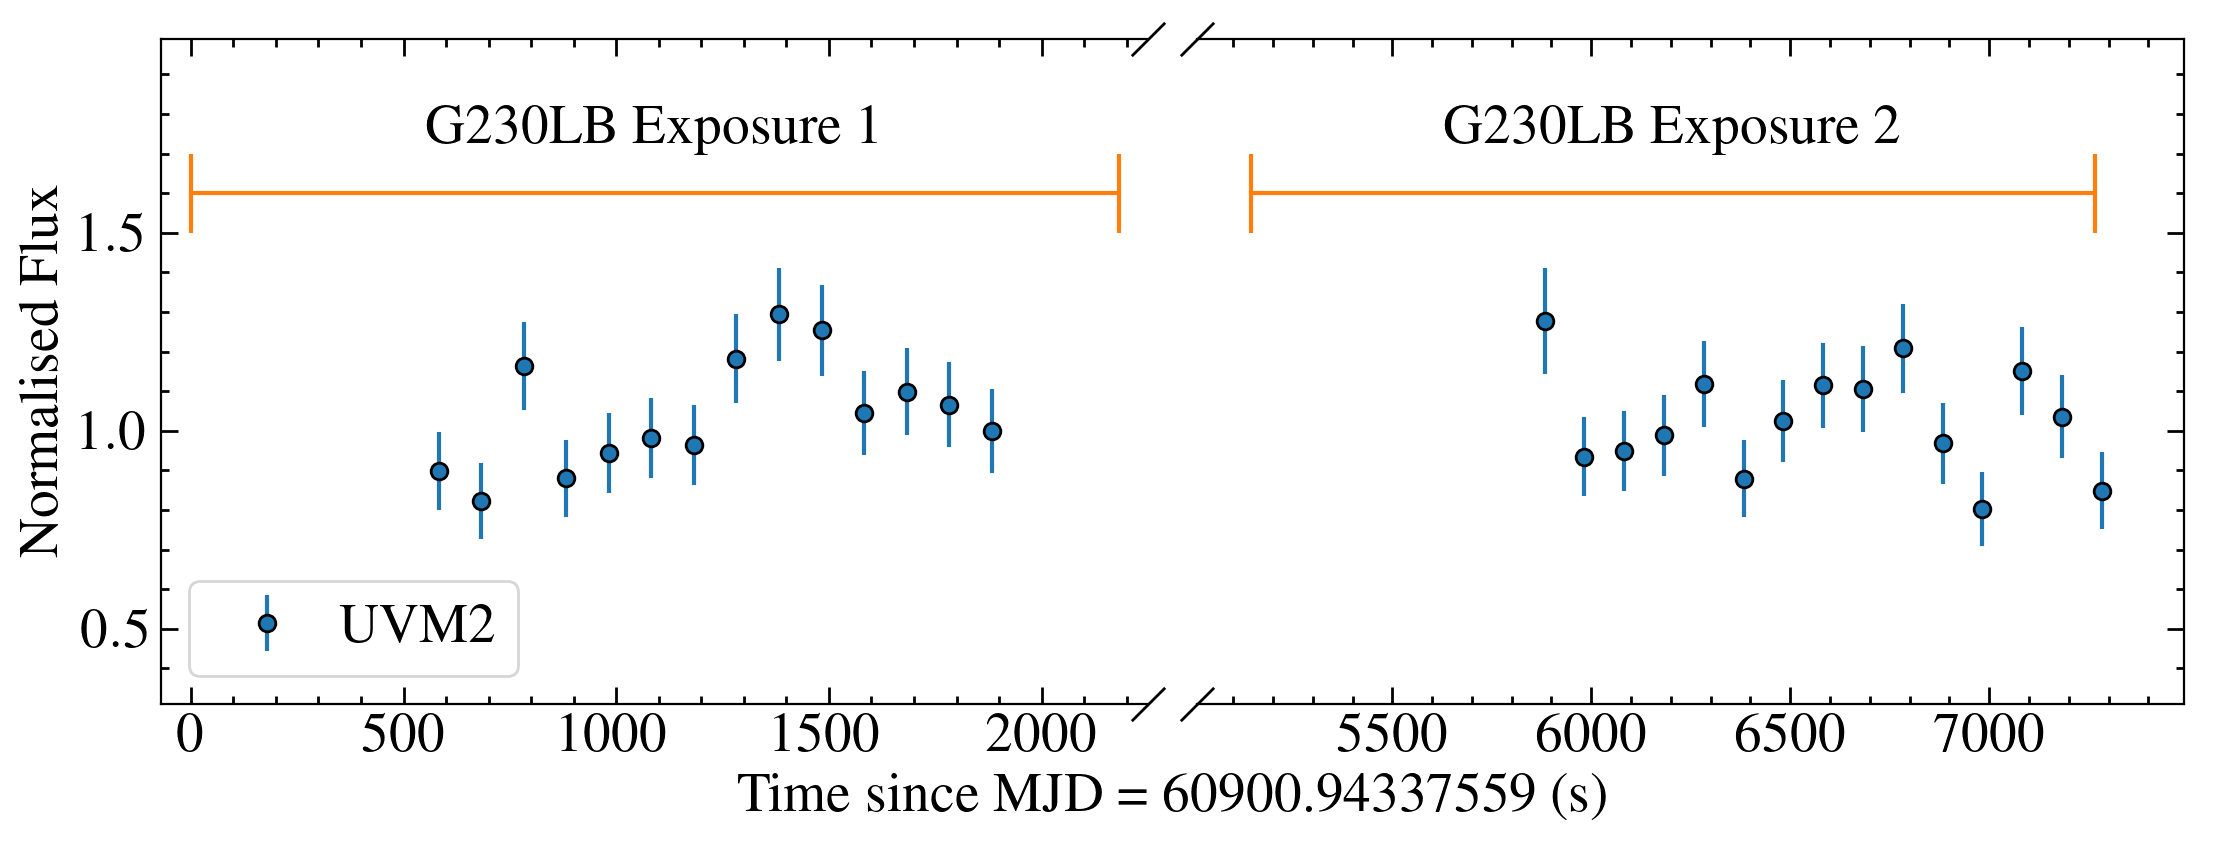

In [144]:
fig, axes = plt.subplots(ncols=2, sharey = True, figsize=(12, 5)) 

#swift reference times
ref_mjd = 51910
ref_sec = ref_mjd * 86400



#hst start and end times
starts = []
ends = []
for x in sx1s:
    hdr = fits.getheader(x, 0)
    starts.append(hdr['TEXPSTRT'])
    ends.append(hdr['TEXPEND'])

mjd0 = min(starts)


m = ['o', 's']
zorders = [-10, 10]
cadences = (10, 100)

line = 1.6
# for i,  lc in enumerate(lcs[::-1][1]):
for j in range(len(axes)):

    data = fits.getdata(lcs[0], 1)
    # ts, flc, elc = data['TIME'][:-2]-data['TIME'][0], data['AB_FLUX_AA'][:-2], data['AB_FLUX_AA_ERR'][:-2]
    ts, flc, elc = data['TIME'], data['AB_FLUX_AA'], data['AB_FLUX_AA_ERR']
    t_mjd = ts  + ref_sec - mjd0 *86400
    flcn, elcn = flc/np.median(flc), elc/np.median(flc)
    mask = flcn > 0.6 #removing last point
    # axes[j].errorbar(t_mjd, flcn, yerr = elcn, marker=m[i], ls='none', markeredgecolor='k', zorder=zorders[i], label=r'UVM2 ({}\,s)'.format(cadences[]))
    axes[j].errorbar(t_mjd[mask], flcn[mask], yerr = elcn[mask], marker='o', ls='none', markeredgecolor='k', label=r'UVM2')

    # axes[j].plot([(starts[j]-mjd0)*86400, (ends[j]-mjd0)*86400], [3, 3])
    axes[j].errorbar([(starts[j]-mjd0)*86400, (ends[j]-mjd0)*86400], [line, line], yerr=[0.1, 0.1])
    axes[j].annotate('G230LB Exposure {}'.format(j+1), (((ends[j]-mjd0)+(starts[j]-mjd0))*86400/2, line*1.1), va='center', ha='center')

axes[0].set_ylim(0.31, 1.99) # should only need to set the ylims on the first subplot because sharey = True
axes[0].set_xlim(-70, 2250) #setting up the ranges that the plots will cover. One row per subplot
axes[1].set_xlim(5010, 7490)

axes[0].legend(frameon=True, loc=3)

"""
Everything between here and the next docstring should work regardless of how many subplots you have
"""

#setting up the slanted lines
d = 1.  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

for i in range(len(axes)):
    
    # axes[i].scatter(xs, ys, edgecolor='k') #add the points to each plot
    
    if i > 0: #turn off yticks for everything except the first plot
        axes[i].yaxis.set_tick_params(labelleft=False)
      
    if i != len(axes)-1: #do these things for every subplot exept the last
        axes[i].spines.right.set_visible(False) #turn off right ax
        axes[i].tick_params(right = False, which='both') #turn off right ticks
        axes[i].plot([1, 1], [0, 1], transform=axes[i].transAxes, **kwargs) #add the slanted line to the right corners
   
    if i > 0: #do these things for every subplot except the first
        axes[i].spines.left.set_visible(False) #as for the last loop but for the left
        axes[i].tick_params(left = False, which='both')
        axes[i].plot([0, 0], [1, 0], transform=axes[i].transAxes, **kwargs)
        
"""
Just the axes labels beyond this.
"""

    
#add a frame that goes around all the subplots to add the labels       
bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Normalised Flux') #change labelpad if the label is overlapping the tick labels
bigax.set_xlabel('Time since MJD = {} (s)'.format(mjd0))
# bigax.set_title('Example plot with split x axis', pad =15) 

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) #change the gap in between the subplots


In [115]:
(np.array(ends)-np.array(starts))*86400

array([2180.99174404, 2119.00838418,  144.01584025])